In [ ]:
!pip install prophet


In [ ]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib.font_manager 임포트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")


Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
폰트 설정 완료


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/2rwdgh2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/t10z9eks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90229', 'data', 'file=/tmp/tmpq5vehdy2/2rwdgh2h.json', 'init=/tmp/tmpq5vehdy2/t10z9eks.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelhb5g4m0g/prophet_model-20240625000819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:08:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:08:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

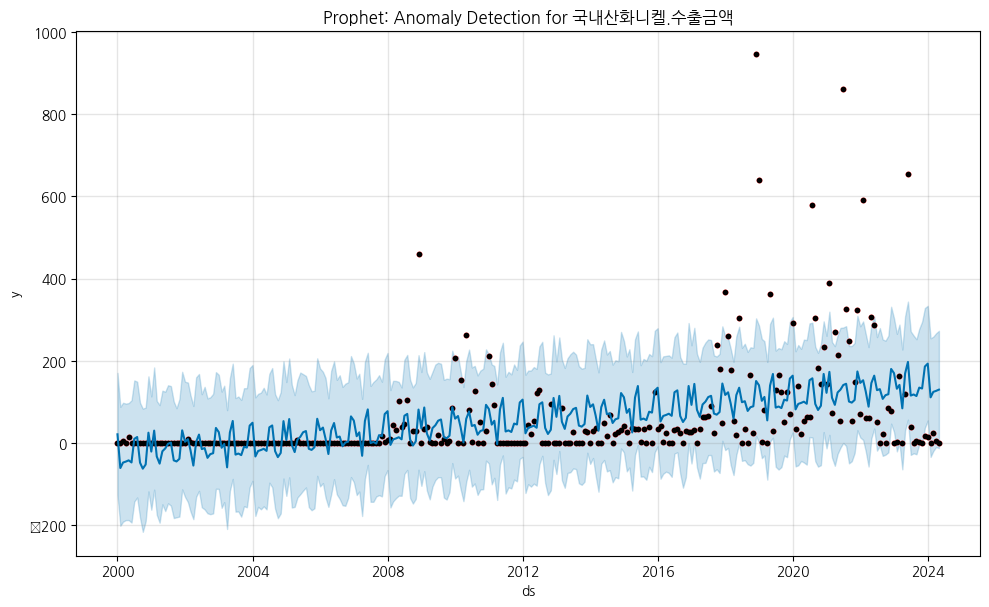

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 날짜와 모든 열에 대해 Prophet 모델 적용
results = []

for column in df.columns:
    if column != 'date':
        temp_df = df[['date', column]].dropna()
        temp_df.columns = ['ds', 'y']

        model = Prophet()
        model.fit(temp_df)

        future = model.make_future_dataframe(periods=0)
        forecast = model.predict(future)

        temp_df['yhat'] = forecast['yhat']
        temp_df['yhat_lower'] = forecast['yhat_lower']
        temp_df['yhat_upper'] = forecast['yhat_upper']
        temp_df['anomaly'] = 0
        temp_df.loc[temp_df['y'] > temp_df['yhat_upper'], 'anomaly'] = 1
        temp_df.loc[temp_df['y'] < temp_df['yhat_lower'], 'anomaly'] = -1

        results.append(temp_df)

# 결과 결합
result_df = pd.concat(results)

# 이상치 데이터만 필터링
outliers = result_df[result_df['anomaly'] != 0]

# 이상치 데이터 저장
outliers.to_csv('prophet_outliers_all_columns.csv', index=False)

# 시각화 예제 (첫 번째 변수에 대한 시각화)
column = df.columns[1]  # 첫 번째 데이터 열 선택
temp_df = df[['date', column]].dropna()
temp_df.columns = ['ds', 'y']
model = Prophet()
model.fit(temp_df)
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.scatter(temp_df['ds'], temp_df['y'], color='r', s=10)
plt.title('Prophet: Anomaly Detection for {}'.format(column))
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/s2yiuuu9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/ojk0ckzn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98498', 'data', 'file=/tmp/tmpq5vehdy2/s2yiuuu9.json', 'init=/tmp/tmpq5vehdy2/ojk0ckzn.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_model_nl2pgb3/prophet_model-20240625001457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


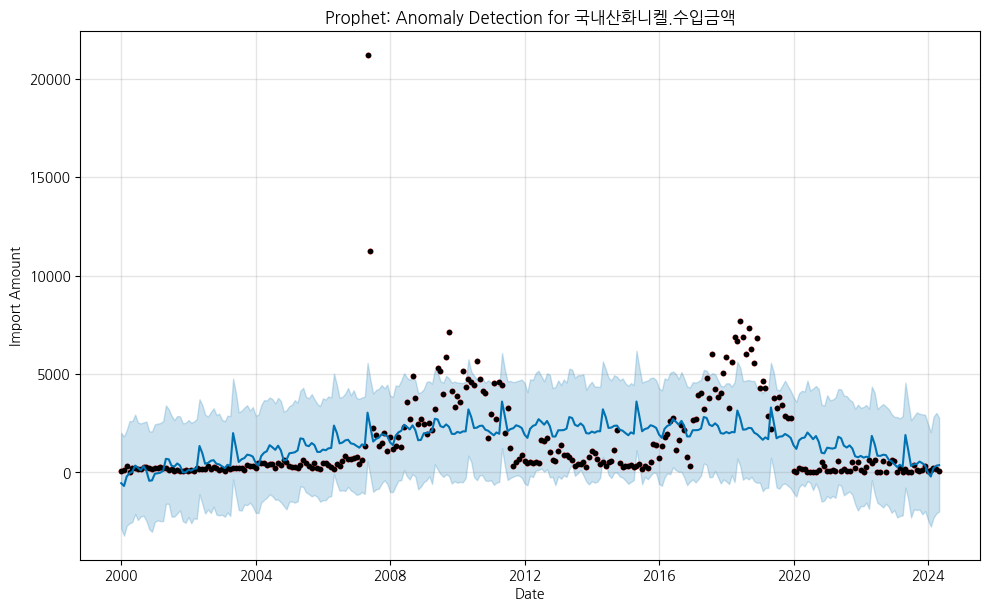

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/zvu4hy2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/1a7zqeus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78519', 'data', 'file=/tmp/tmpq5vehdy2/zvu4hy2h.json', 'init=/tmp/tmpq5vehdy2/1a7zqeus.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelnu02qc5i/prophet_model-20240625001458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


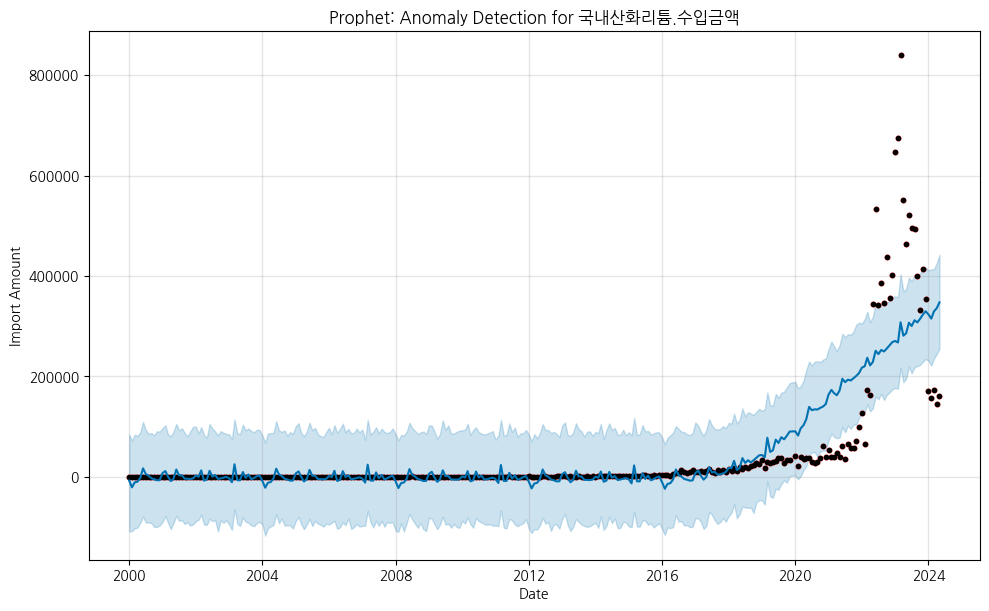

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/h5wia82t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/z78z8fau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42478', 'data', 'file=/tmp/tmpq5vehdy2/h5wia82t.json', 'init=/tmp/tmpq5vehdy2/z78z8fau.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_model3zclhjlr/prophet_model-20240625001459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

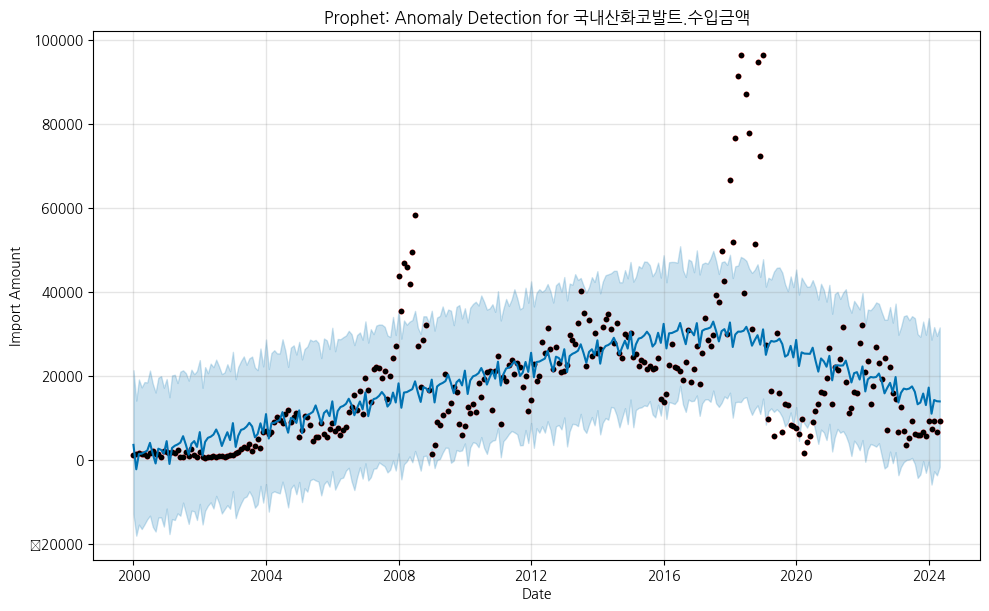

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/sirpx1z0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/g3in65bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34540', 'data', 'file=/tmp/tmpq5vehdy2/sirpx1z0.json', 'init=/tmp/tmpq5vehdy2/g3in65bw.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modele0a7x0_1/prophet_model-20240625001459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


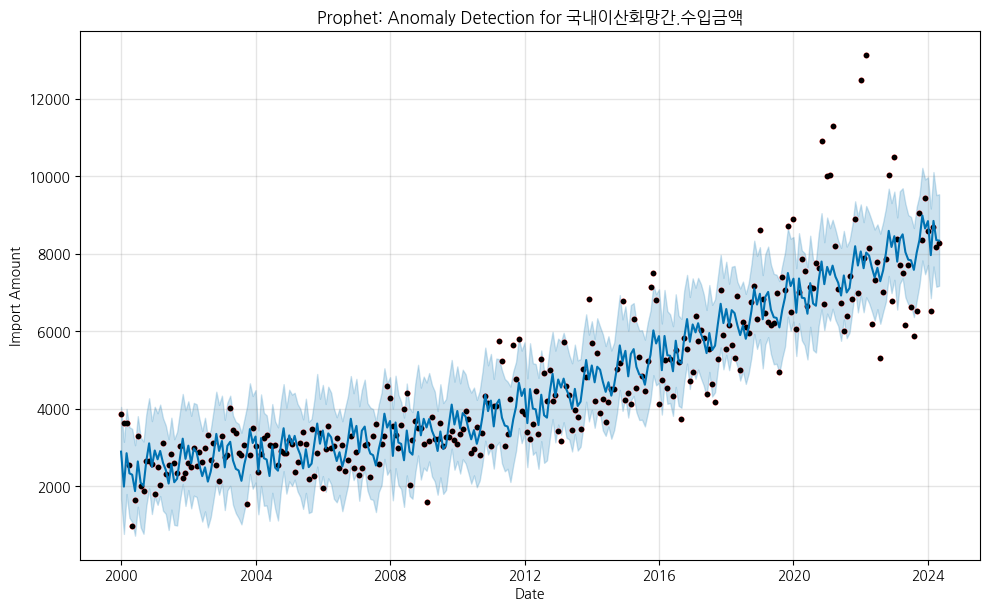

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/v7j3tiio.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/50vetbb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36590', 'data', 'file=/tmp/tmpq5vehdy2/v7j3tiio.json', 'init=/tmp/tmpq5vehdy2/50vetbb2.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelsb4krejj/prophet_model-20240625001500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


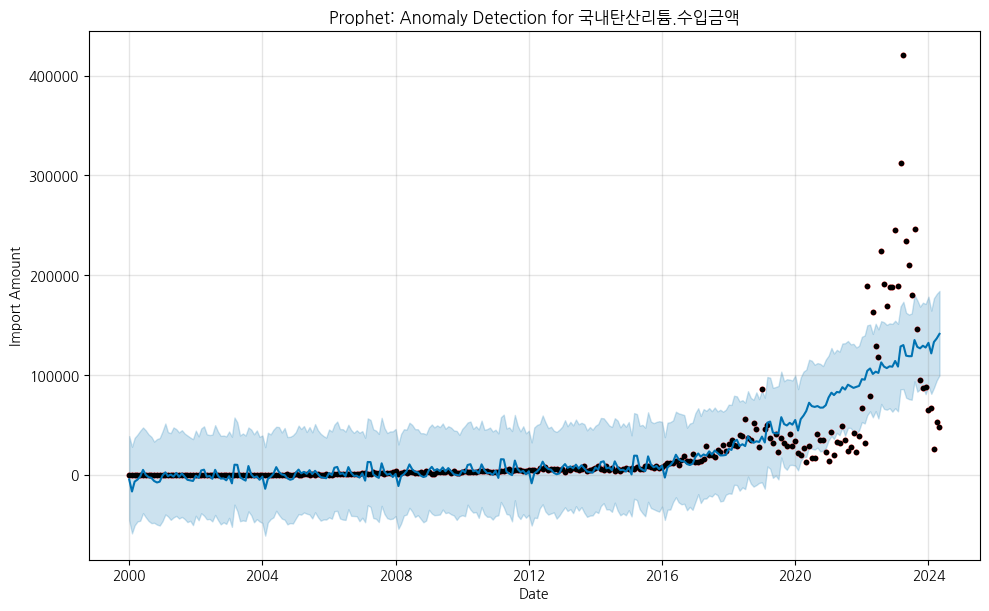

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/yvtnz6_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/jwbs9bfm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22252', 'data', 'file=/tmp/tmpq5vehdy2/yvtnz6_h.json', 'init=/tmp/tmpq5vehdy2/jwbs9bfm.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelosknprws/prophet_model-20240625001502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


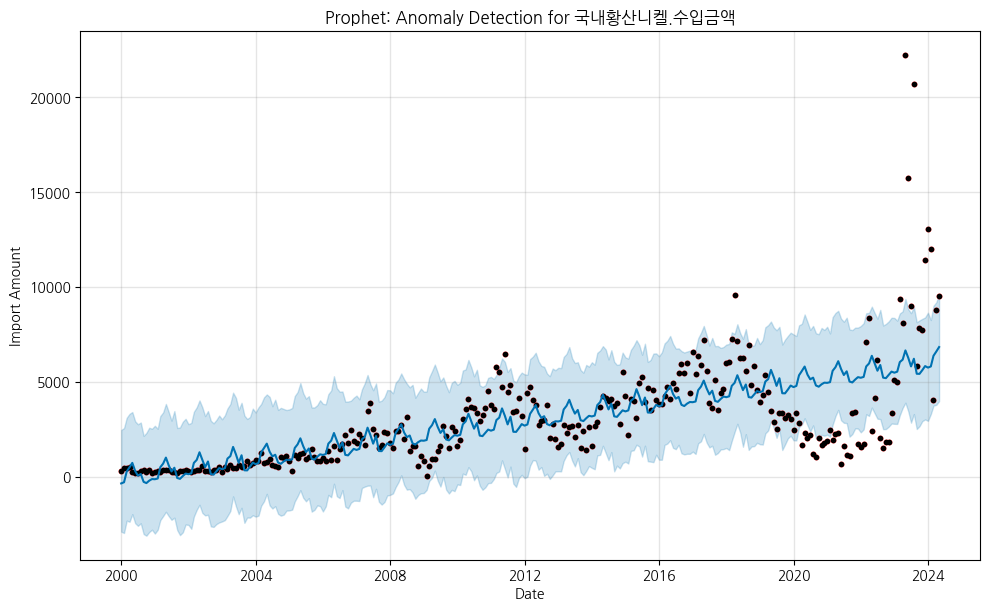

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/oijcn61x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/tsthufzv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21279', 'data', 'file=/tmp/tmpq5vehdy2/oijcn61x.json', 'init=/tmp/tmpq5vehdy2/tsthufzv.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelknmw7clw/prophet_model-20240625001504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


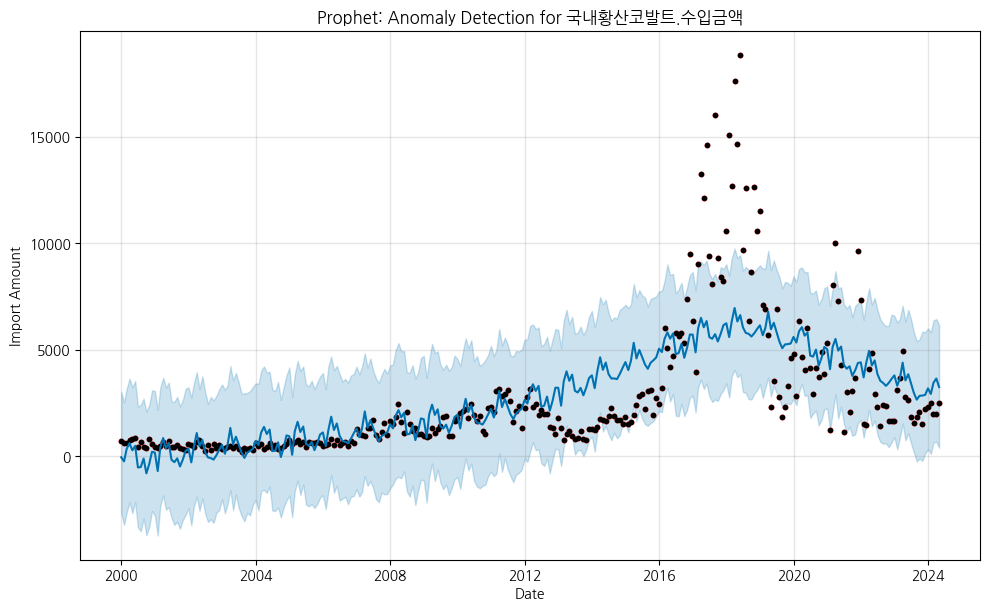

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



# 국내 광물 수입금액 관련 열
import_columns = [
    '국내산화니켈.수입금액', '국내산화리튬.수입금액', '국내산화코발트.수입금액',
    '국내이산화망간.수입금액', '국내탄산리튬.수입금액', '국내황산니켈.수입금액',
    '국내황산코발트.수입금액'
]

# Prophet 모델 적용 및 시각화
for column in import_columns:
    temp_df = df[['date', column]].dropna()
    temp_df.columns = ['ds', 'y']

    model = Prophet()
    model.fit(temp_df)

    future = model.make_future_dataframe(periods=0)
    forecast = model.predict(future)

    temp_df['yhat'] = forecast['yhat']
    temp_df['yhat_lower'] = forecast['yhat_lower']
    temp_df['yhat_upper'] = forecast['yhat_upper']
    temp_df['anomaly'] = 0
    temp_df.loc[temp_df['y'] > temp_df['yhat_upper'], 'anomaly'] = 1
    temp_df.loc[temp_df['y'] < temp_df['yhat_lower'], 'anomaly'] = -1

    # 시각화
    fig = model.plot(forecast)
    plt.scatter(temp_df['ds'], temp_df['y'], color='r', s=10)
    plt.title(f'Prophet: Anomaly Detection for {column}')
    plt.xlabel('Date')
    plt.ylabel('Import Amount')
    plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/65rq9ecx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/rc6rfnlv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32953', 'data', 'file=/tmp/tmpq5vehdy2/65rq9ecx.json', 'init=/tmp/tmpq5vehdy2/rc6rfnlv.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modeldsim98lp/prophet_model-20240625002123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


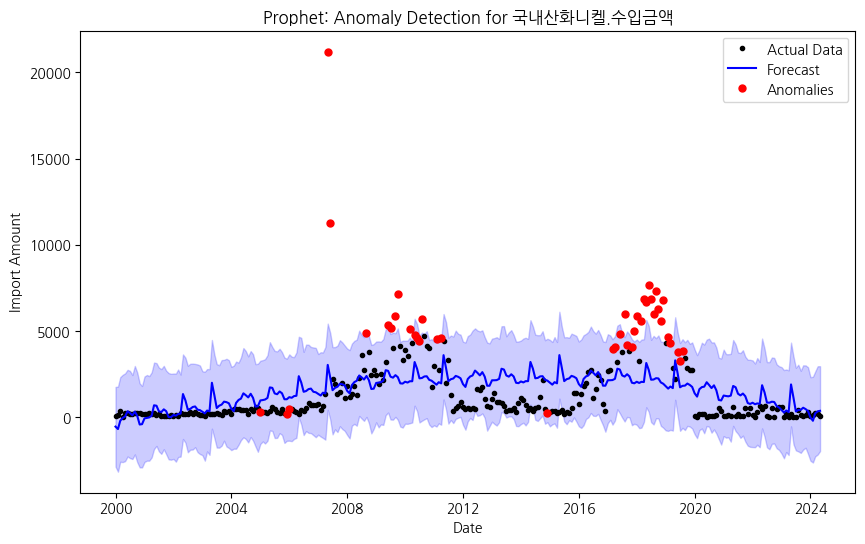

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/ulds01rb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/4uj8lriw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97515', 'data', 'file=/tmp/tmpq5vehdy2/ulds01rb.json', 'init=/tmp/tmpq5vehdy2/4uj8lriw.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelion406h6/prophet_model-20240625002124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


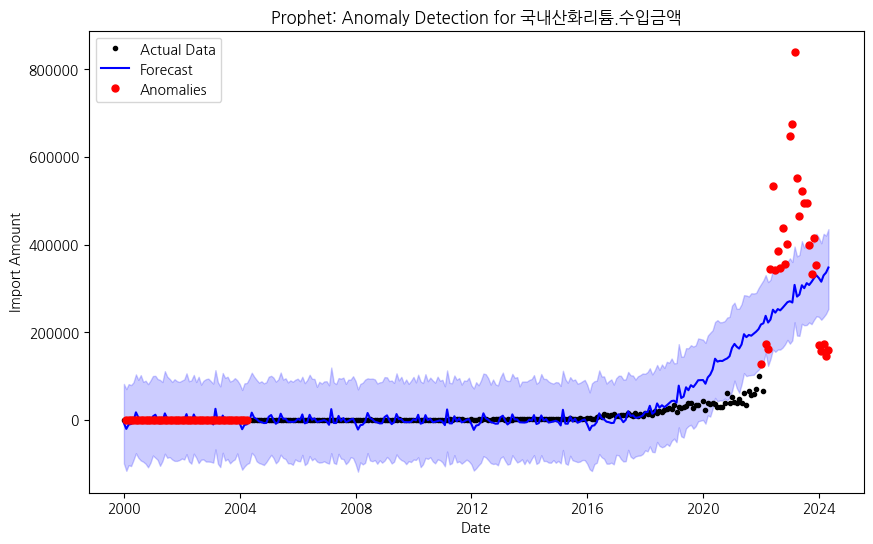

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/he_7pfiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/x42asd93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25426', 'data', 'file=/tmp/tmpq5vehdy2/he_7pfiw.json', 'init=/tmp/tmpq5vehdy2/x42asd93.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelyicnttqf/prophet_model-20240625002125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

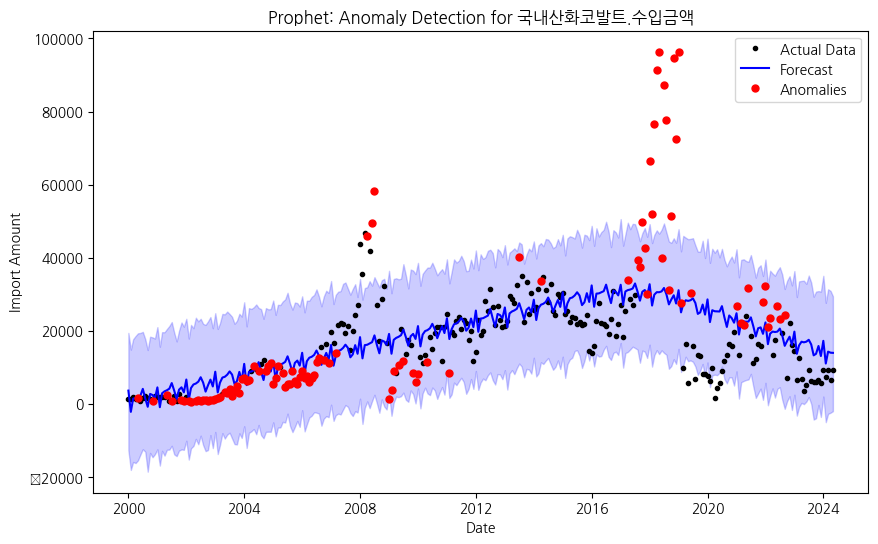

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/3bfgd_td.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/45g2bs22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70204', 'data', 'file=/tmp/tmpq5vehdy2/3bfgd_td.json', 'init=/tmp/tmpq5vehdy2/45g2bs22.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_model6kdjxyqu/prophet_model-20240625002125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


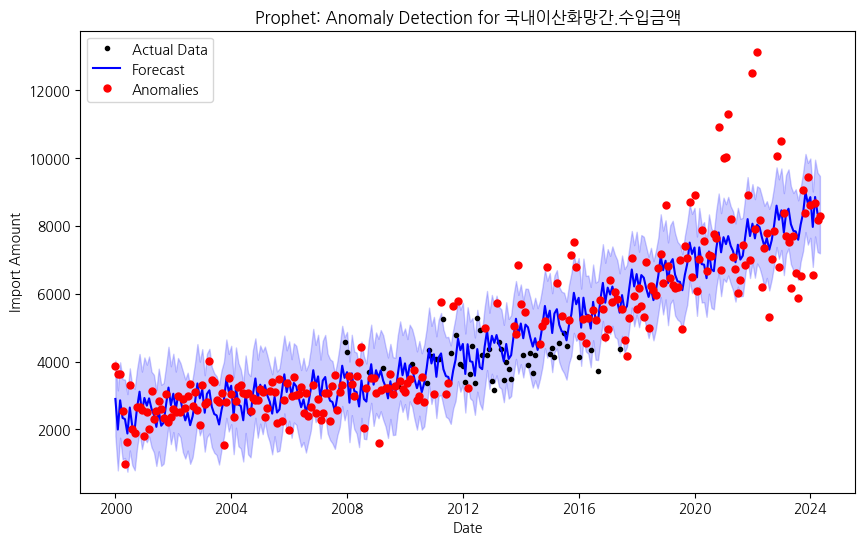

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/l7qh7gp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/sfrlndyl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22732', 'data', 'file=/tmp/tmpq5vehdy2/l7qh7gp_.json', 'init=/tmp/tmpq5vehdy2/sfrlndyl.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelc5c5k_g_/prophet_model-20240625002126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


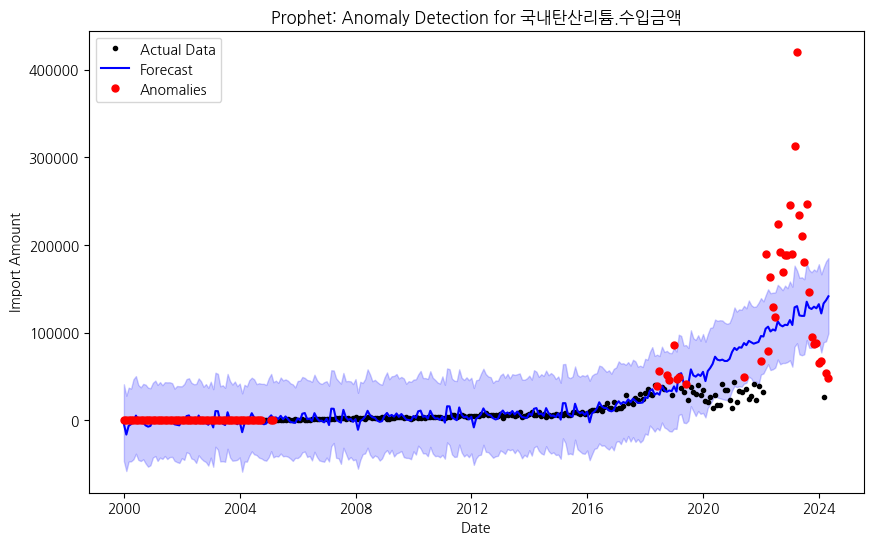

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/qw6jsoeb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/rsczxi2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12059', 'data', 'file=/tmp/tmpq5vehdy2/qw6jsoeb.json', 'init=/tmp/tmpq5vehdy2/rsczxi2e.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modelib4jtfo1/prophet_model-20240625002127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


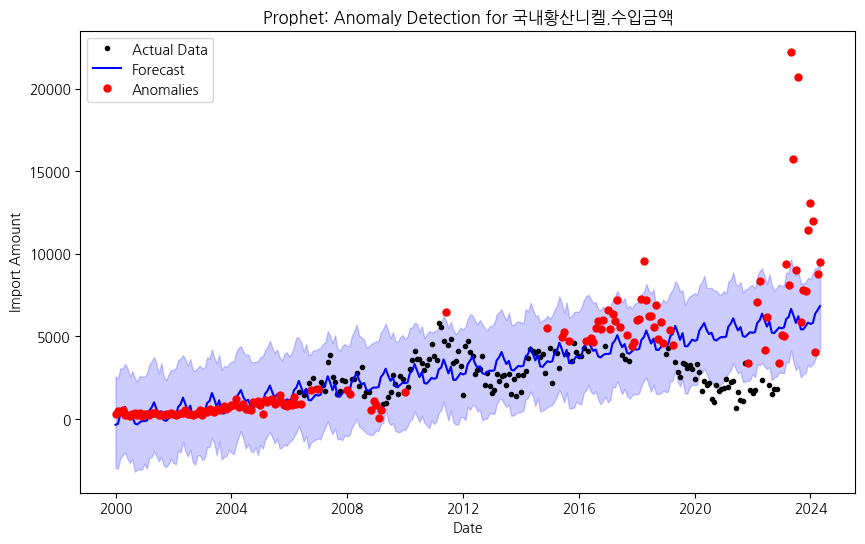

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/0dpvcsyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5vehdy2/8cdaw04o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74174', 'data', 'file=/tmp/tmpq5vehdy2/0dpvcsyz.json', 'init=/tmp/tmpq5vehdy2/8cdaw04o.json', 'output', 'file=/tmp/tmpq5vehdy2/prophet_modeluqd2skqr/prophet_model-20240625002127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


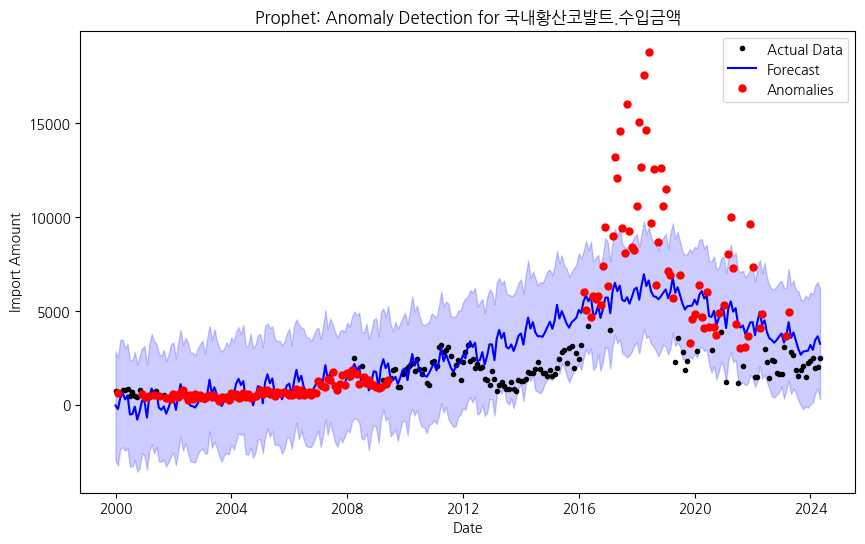

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 날짜 형식을 맞춰줍니다.
df['date'] = pd.to_datetime(df['date'])

# 국내 광물 수입금액 관련 열
import_columns = [
    '국내산화니켈.수입금액', '국내산화리튬.수입금액', '국내산화코발트.수입금액',
    '국내이산화망간.수입금액', '국내탄산리튬.수입금액', '국내황산니켈.수입금액',
    '국내황산코발트.수입금액'
]

# Prophet 모델 적용 및 시각화
for column in import_columns:
    temp_df = df[['date', column]].dropna()
    temp_df.columns = ['ds', 'y']

    model = Prophet()
    model.fit(temp_df)

    future = model.make_future_dataframe(periods=0)
    forecast = model.predict(future)

    temp_df['yhat'] = forecast['yhat']
    temp_df['yhat_lower'] = forecast['yhat_lower']
    temp_df['yhat_upper'] = forecast['yhat_upper']
    temp_df['anomaly'] = 0
    temp_df.loc[temp_df['y'] > temp_df['yhat_upper'], 'anomaly'] = 1
    temp_df.loc[temp_df['y'] < temp_df['yhat_lower'], 'anomaly'] = -1

    # 시각화
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(temp_df['ds'], temp_df['y'], 'k.', label='Actual Data')
    ax.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')

    # 이상치 빨간색으로 표시
    anomalies = temp_df[temp_df['anomaly'] != 0]
    ax.plot(anomalies['ds'], anomalies['y'], 'ro', markersize=5, label='Anomalies')

    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
    ax.set_title(f'Prophet: Anomaly Detection for {column}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Import Amount')
    ax.legend()
    plt.show()
